# Tesseract example code

To be able to use this code, you will need to have the packages opencv (image reading and maipluation), tesseract (OCR) and pytesseract (tesseract python bindings) installed. You can install pytesseract by running the following command in your terminal:

```
pip3 install --user pytesseract
```

More information can be found at: https://pypi.org/project/pytesseract/

## Importing some modules

We start with importing som modules that will come in handy.

In [2]:
import cv2                      # Computer Vision
import numpy as np              # Vector math
import pytesseract              # OCR
import matplotlib.pyplot as plt # Plotting
from PIL import ImageFont, ImageDraw, Image
%matplotlib inline

## Reading text from a file and render it to an image

For testing tesseract it can be useful to be able to create an image with text and then convert the image back to text data. We can conceptualise this as a function $f: T \rightarrow I$ from the text domain to the image domain. This will be implemented using [OpenCV](https://opencv.org/). We then define a function $g: I \rightarrow T$, as an approximation of the inverse of $f$. Tesseract will stand in for the inverse function. After these steps, we can see if we got back what we started with. The character (or word) error rate can be measured as a way to quantify the quality of $g$. For testing the robustness of $g$, we will insert some image noise between $f$ and $g$. This is the qualitative part of the lab.

First, we'll need to read some text.

In [3]:
#file = "Eisenhower.txt"
file = "zprava.txt"
# Read in some text
with open(file, 'r') as file:
    original_text = file.read()

print(original_text)

Facebook se brání kritice tak, že v nejlepším politickém 
stylu hledá špínu na své oponenty. Dělá to však neobratně 
a škodu zřejmě utrpí hlavně on sám.
Facebook letos nemá dobrý rok. Od jeho začátku je pod 
palbou kritiky: protože umožňuje politickou propagandu 
zahraničních subjektů a jejich vměšování do voleb v různých 
zemích, protože se neumí vypořádat s hate speech neboli 
projevy nenávisti, protože se s nimi vypořádává až příliš 
důkladně... V březnu vypukla aféra Cambridge Analytica, 
během níž si mnoho uživatelů uvědomilo, k čemu využívá 
sociální médium jejich osobní data a jak lze facebookové 
profily využít k manipulaci celou společností. Objektivně 
vzato to nebylo nic nového, ale poprvé se o tom začalo 
skutečně mluvit a přemýšlet. Akcie klesly, tehdy ještě 
dočasně.
Následoval vzestup, ale od července kurs znovu klesá. 
Investoři začali posuzovat Facebook jako mírně poškozené 
zboží a pozorněji sledovat jeho finanční výsledky, které 
ostatně opravdu nejsou tak skvělé, ja

Now for rendering the text to an image and then crop the image to reduce the margins (our function $f$). 

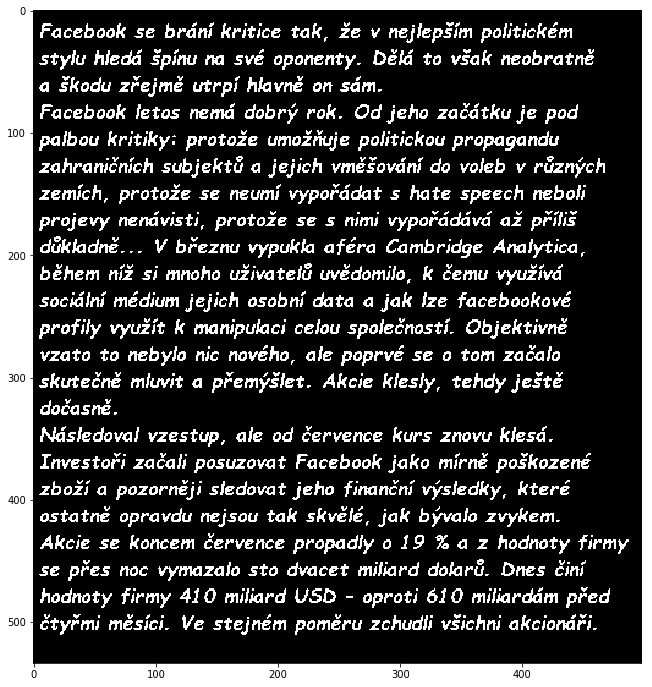

In [23]:
def render_text_pil(texttorender, ptsize=12, fontfile="comicz.ttf"):
    font = ImageFont.truetype(fontfile, ptsize)
    pimg = Image.new('L', (1, 1))
    draw = ImageDraw.Draw(pimg)
    x,y = draw.textsize(texttorender, font=font)
    pimg = Image.new('L', (x+10,y+10))
    draw = ImageDraw.Draw(pimg)
    draw.text((5,5), texttorender, fill=1, font=font)
    img = np.array(pimg,dtype=np.uint8)
    return img

def render_text_pil_gray(texttorender, ptsize=12, fontfile="comicz.ttf"):
    font = ImageFont.truetype(fontfile, 3*ptsize)
    pimg = Image.new("RGB", (1, 1))
    draw = ImageDraw.Draw(pimg)
    x,y = draw.textsize(texttorender, font=font)
    pimg = Image.new("RGB", (x+10,y+10))
    draw = ImageDraw.Draw(pimg)
    draw.text((5,5), texttorender, fill=(255,255,255), font=font)
    pimg_resized = pimg.resize((x//3,y//3), Image.BICUBIC)
    img = np.array(pimg_resized,dtype=np.uint8)
    return img

image_with_text = render_text_pil(original_text,16)
image_with_text = render_text_pil_gray(original_text,16)[:,:,0]
plt.figure(figsize=(12, 12))
plt.imshow(image_with_text, cmap='gray');
#dir(Image)

Now for the function $g$ (this can take some time, depending on the available computing power).

In [24]:
extracted_text = pytesseract.image_to_string(image_with_text, lang="ces")
print(extracted_text)

Facebunk se brání kritice tak, že v nejlepšim politicke'm
stylu hledá špl'nu na sve' oponenty. Dělá to však neobratně
a škodu zřejmě utrpí hlavně on sa'm.

Facebunk letos nema' dobrý rok. ad jeho zača'tku je pod
palbuu kritiky: prntnž: umnžňuy': politickou propagandu
zahraničních subjektů a jejich vměšova'ni do voleb v různých
zemích, protože se neuml' vypořádat s hat: speech neboli
prujzvy nenávisti, prutnž: se s nimi vypořádává až přiliš
důkladně... v březnu vypukla afe'ra Cambridge Amlytl'cu,
během níž si mnoho uživatelů wěduml'lu, !( čemu využívá
socialni me'dium jejich osobní data a jak lze facebuuknvé
profily využít k manipulaci celou společnosti. objektivně
vzato to nebylo nic nového, ale poprvé se o tom začalo
skutečně mluvit a přemýšlet. Akcie klesly, tehdy ještě
dučasně.

Následoval vzestup, al: nd července kurs znovu klesá.
Investoři začali posuzth Facebunk jako mirnč poškozene'
zbnžl'a pozorněji sledovat jeho finančni výsledky, které
ostatně opravdu nejsou tak skvělé, jak b

## Testing the quality

A common metric of quality of the OCR is the word error rate, i.e. the number of non-recognised words in relation to the total number of words. This can be done by flexibly matching the original text with the text returned from the OCR.

A big thanks to https://martin-thoma.com/word-error-rate-calculation/ for sharing their code on Levenshtein distance.

In [7]:
from borrowed_code import wer
print(wer.__doc__)


    Calculation of WER with Levenshtein distance.

    Works only for iterables up to 254 elements (uint8).
    O(nm) time ans space complexity.

    Parameters
    ----------
    r : list
    h : list

    Returns
    -------
    int

    Examples
    --------
    >>> wer("who is there".split(), "is there".split())
    1
    >>> wer("who is there".split(), "".split())
    3
    >>> wer("".split(), "who is there".split())
    3
    


In [12]:
print(original_text.split()[:20])
print(extracted_text.split()[:20])
we = wer(original_text.split(), extracted_text.split())
print("Word errors:", we)
print("WER:", we/max(len(original_text.split()), len(extracted_text.split())))

['A', 'vital', 'element', 'in', 'keeping', 'the', 'peace', 'is', 'our', 'military', 'establishment.', 'Our', 'arms', 'must', 'be', 'mighty,', 'ready', 'for', 'instant', 'action,']
['A', 'vital', 'element', 'in', 'keeping', 'the', 'peace', 'is', 'our', 'military', 'establishment.', 'Our', 'arms', 'must', 'be', 'mighty,', 'ready', 'for', 'instant', 'action,']
Word errors: 5
WER: 0.025380710659898477


In [14]:
print(list(original_text)[:20])
print(list(extracted_text)[:20])
ce = wer(list(original_text), list(extracted_text))
print("Character errors:", ce)
print("CER:", ce/max(len(list(original_text)), len(list(extracted_text))))

['A', ' ', 'v', 'i', 't', 'a', 'l', ' ', 'e', 'l', 'e', 'm', 'e', 'n', 't', ' ', 'i', 'n', ' ', 'k']
['A', ' ', 'v', 'i', 't', 'a', 'l', ' ', 'e', 'l', 'e', 'm', 'e', 'n', 't', ' ', 'i', 'n', ' ', 'k']
Character errors: 23
CER: 0.018167456556082148


## A real world example

This image is from an old encyclopedia.

Gutenberg [go’-], Johann (hette egentligen 
Henne Gensfleisch, men är mest känd under 
namnet G., upptaget efter en gård, som i flera 
släktled tillhört familjen), boktryckarkonstens 
uppfinnare, f. mellan 1394 och 1397 i Mainz, 
d. där 1468. Både på fädernet och mödernet 
härstammade han från gamla patriciska 
familjer. Om hans lefnadsomständigheter 
känner man icke mycket. Redan före 1430 
lämnade han Mainz, och sedermera begaf han sig 
till Strassburg, där han bevisligen uppehöll 
sig 1434 och där han under de följande åren 
sysselsatte sig med "geheime und wunderbare 
künste". 1439 uppstod mellan honom och hans 
kompanjoner en process, hvars handlingar, 
som ännu finnas i behåll, äro af stor vikt för 
historien om boktryckarkonstens ursprung. Under 
vistelsen i Strassburg företog G. sina första 
tryckningsförsök, och tanken att använda rörliga 
typer torde redan där ha uppstått hos honom. Det 
var dock först sedermera, som han använde sin 
konst för praktiska ändamål. Efter att 144

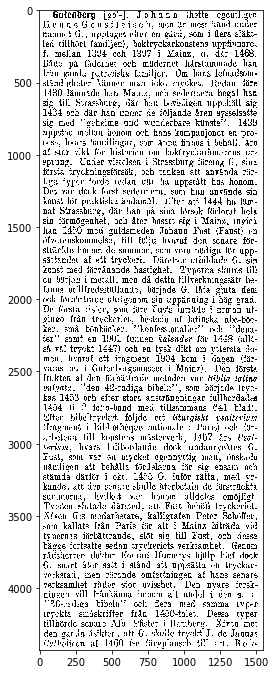

In [8]:
with open("Gutenberg.txt", 'r', encoding='utf-8') as file:
    original_text = file.read()
print(original_text)

img = cv2.imread("Gutenberg.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4, 12))
plt.imshow(img, cmap='gray');

Now for extracting the text and calculating the error rates.

In [9]:
extracted_text = pytesseract.image_to_string(img)

we = wer(original_text.split(), extracted_text.split())
print("Word errors:", we)
print("WER:", we/max(len(original_text.split()), len(extracted_text.split())))

ce = wer(list(original_text), list(extracted_text))
print("Character errors:", ce)
print("CER:", ce/max(len(list(original_text)), len(list(extracted_text))))

Word errors: 169
WER: 0.32688588007736946
Character errors: 115
CER: 0.034659433393610606


OCR can incorporate knowledge of language in the recognition. Let's try OCR with a language model for Swedish.

In [10]:
extracted_text = pytesseract.image_to_string(img, lang='swe')

we = wer(original_text.split(), extracted_text.split())
print("Word errors:", we)
print("WER:", we/max(len(original_text.split()), len(extracted_text.split())))

ce = wer(list(original_text), list(extracted_text))
print("Character errors:", ce)
print("CER:", ce/max(len(list(original_text)), len(list(extracted_text))))

Word errors: 70
WER: 0.13513513513513514
Character errors: 122
CER: 0.03676913803496082


Unsurprisingly, the error rate for words in greatly improved.

In [11]:
# TODO Visualise the bbx data
d = pytesseract.image_to_boxes(img)
d

"G 96 4372 129 4423 0\nu 139 4372 166 4409 0\nt 172 4373 192 4423 0\ne 198 4372 224 4411 0\nn 230 4372 257 4411 0\nb 265 4372 294 4422 0\ne 300 4372 327 4410 0\nr 332 4373 358 4410 0\ng 360 4360 388 4409 0\n[ 450 4359 469 4423 0\ng 475 4357 502 4405 0\no 507 4372 532 4406 0\n’ 537 4393 548 4421 0\n- 553 4386 572 4393 0\n] 574 4359 593 4423 0\n, 607 4361 616 4381 0\nJ 678 4371 705 4421 0\no 728 4372 753 4405 0\nh 774 4372 805 4421 0\na 826 4372 853 4404 0\nn 875 4373 902 4405 0\nn 927 4373 954 4405 0\n( 1019 4367 1030 4422 0\nh 1037 4372 1067 4421 0\ne 1072 4372 1095 4405 0\nt 1099 4373 1117 4420 0\nt 1121 4373 1138 4419 0\ne 1144 4372 1169 4405 0\ne 1229 4373 1253 4406 0\ng 1258 4358 1286 4407 0\ne 1291 4374 1314 4407 0\nn 1319 4375 1348 4407 0\nt 1353 4374 1370 4419 0\nl 1375 4375 1390 4423 0\ni 1391 4374 1408 4422 0\ng 1414 4359 1441 4407 0\ne 1445 4373 1469 4407 0\nn 1476 4376 1505 4408 0\nH 26 4304 74 4352 0\ne 95 4305 119 4337 0\nn 141 4305 170 4338 0\nn 192 4305 220 4337 0\ne 244